In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('data.csv')
df.head(100)
# RPM, Padm(bar), Pdis(bar), SN(mm), SC(lpm), Torque(Nm), Ht(m), Nh(W), Nm(W), Eff(%)


,RPM,Padm,Pdis,SN,SC,Torque,Ht,Nh,Nm,Eff
0,1800,-0.01,0.12,35.80,10.90,0.35,1.52,2.71,66.20,4.10
1,1800,-0.01,0.13,33.75,9.98,0.34,1.58,2.57,63.44,4.05
2,1800,-0.01,0.14,33.60,9.91,0.35,1.69,2.74,66.03,4.15
3,1800,-0.01,0.16,31.01,8.79,0.35,1.81,2.60,66.00,3.94
4,2200,-0.04,0.15,40.12,12.93,0.38,2.09,4.42,88.30,5.01
5,2200,-0.04,0.15,39.75,12.75,0.38,2.14,4.46,86.80,5.13
6,2200,-0.03,0.18,39.50,12.63,0.39,2.29,4.73,89.88,5.27
7,2200,-0.01,0.25,33.35,9.80,0.43,2.82,4.52,99.97,4.52
8,2200,-0.01,0.25,33.79,10.00,0.43,2.85,4.65,98.96,4.70
9,2200,-0.05,0.14,40.55,13.14,0.36,2.09,4.50,83.97,5.35


Text(0, 0.5, 'Ht (m)')

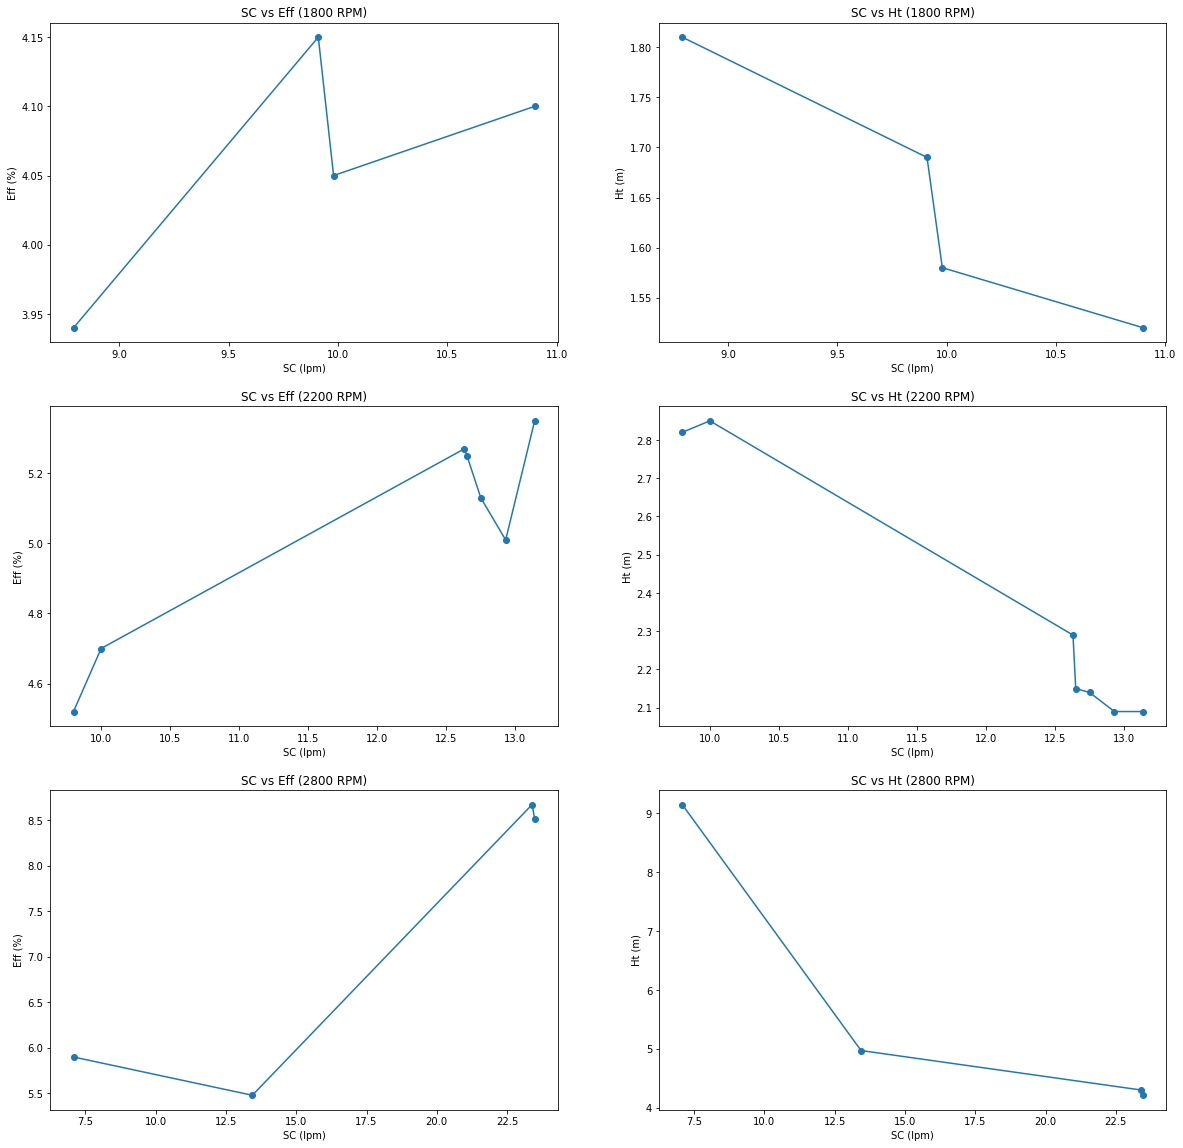

In [12]:
df = df.sort_values(by='SC', ascending=False)

fig, ax = plt.subplots(3, 2, figsize=(20, 20))

df_1800 = df.loc[df['RPM'] == 1800]
ax[0][0].plot(df_1800['SC'], df_1800['Eff'], 'o-')
ax[0][0].set_title('SC vs Eff (1800 RPM)')
ax[0][0].set_xlabel('SC (lpm)')
ax[0][0].set_ylabel('Eff (%)')

ax[0][1].plot(df_1800['SC'], df_1800['Ht'], 'o-')
ax[0][1].set_title('SC vs Ht (1800 RPM)')
ax[0][1].set_xlabel('SC (lpm)')
ax[0][1].set_ylabel('Ht (m)')

df_2200 = df.loc[df['RPM'] == 2200]
ax[1][0].plot(df_2200['SC'], df_2200['Eff'], 'o-')
ax[1][0].set_title('SC vs Eff (2200 RPM)')
ax[1][0].set_xlabel('SC (lpm)')
ax[1][0].set_ylabel('Eff (%)')

ax[1][1].plot(df_2200['SC'], df_2200['Ht'], 'o-')
ax[1][1].set_title('SC vs Ht (2200 RPM)')
ax[1][1].set_xlabel('SC (lpm)')
ax[1][1].set_ylabel('Ht (m)')

df_2800 = df.loc[df['RPM'] == 2800]
ax[2][0].plot(df_2800['SC'], df_2800['Eff'], 'o-')
ax[2][0].set_title('SC vs Eff (2800 RPM)')
ax[2][0].set_xlabel('SC (lpm)')
ax[2][0].set_ylabel('Eff (%)')

ax[2][1].plot(df_2800['SC'], df_2800['Ht'], 'o-')
ax[2][1].set_title('SC vs Ht (2800 RPM)')
ax[2][1].set_xlabel('SC (lpm)')
ax[2][1].set_ylabel('Ht (m)')
